In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as metrics

In [3]:
pred = pd.read_csv("imbalancesolution.csv") #Train Dataset
predtest = pd.read_csv("prediction_test.csv") #Test Dataset

In [5]:
threshold = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for z in threshold:
  pred[z] = pred["Pred_Prob"].map(lambda x: 0 if x<z else 1)

In [6]:
pred.head()

,Unnamed: 0,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.037746,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.086650,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0.010050,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0.043852,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.010471,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
curve = pd.DataFrame(index = threshold, columns = ["accuracy","sensitivity","specificity"])

In [10]:
for y in threshold:  
  matrix = metrics.confusion_matrix(pred.Actual,pred[y])
  accuracy = (matrix[1,1] + matrix[0,0])/ (matrix.sum())
  sensitivity = (matrix[1,1])/(matrix[1,1] + matrix[1,0])
  specificity = (matrix[0,0])/(matrix[0,0] + matrix[0,1])

  curve.loc[y] = [accuracy,sensitivity,specificity]

In [11]:
curve

,accuracy,sensitivity,specificity
0.01,0.89432,0.669864,0.895627
0.02,0.961172,0.549427,0.96357
0.03,0.978435,0.511058,0.981156
0.04,0.985558,0.463363,0.988598
0.05,0.989496,0.427391,0.992769
0.06,0.991814,0.404077,0.995236
0.07,0.992953,0.388223,0.996474
0.08,0.993528,0.373435,0.997138
0.09,0.993869,0.361844,0.997549
0.10,0.994107,0.347056,0.997875


In [13]:
for y in threshold:
  curve.loc[y,"Precision"] = metrics.precision_score(pred.Actual,pred[y])
  curve.loc[y,"Recall"] = metrics.recall_score(pred.Actual,pred[y])

<AxesSubplot:>

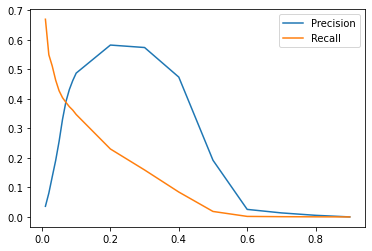

In [14]:
curve[["Precision","Recall"]].plot()

In [ ]:
##We see that intersection point is 0.1 so!!

In [20]:
data = pd.read_csv('Data_Detailed/frauddata_detailed.csv') #Train Dataset
profit = pd.merge(data["amt"],pred,left_index = True,right_index=True)

In [21]:
profit

,amt,Unnamed: 0,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,...,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4.97,0,0,0.037746,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,0,0.086650,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,220.11,2,0,0.010050,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,3,0,0.043852,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,4,0,0.010471,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,1296670,0,0.000950,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296671,51.70,1296671,0,0.000721,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296672,105.93,1296672,0,0.000580,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296673,74.90,1296673,0,0.000534,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
profit_table = pd.DataFrame(index=threshold,columns = ["Fraud_Loss","Predicted_Loss","Cost","Profit_Of_Company"])

In [23]:
for z in threshold:
  loss = data[data["is_fraud"]==1]["amt"].sum()
  Predicted_Loss1 = profit[(profit[z]==1) & (profit["Actual"]==1)]["amt"].sum()
  cost = profit[z].sum()*1.5
  Profit = Predicted_Loss1 - cost

  profit_table.loc[z] = [loss,Predicted_Loss1,cost,Profit]

In [24]:
profit_table

,Fraud_Loss,Predicted_Loss,Cost,Profit_Of_Company
0.01,3988088.61,3615402.66,209374.5,3406028.16
0.02,3988088.61,3228350.09,76633.5,3151716.59
0.03,3988088.61,3069474.47,42193.5,3027280.97
0.04,3988088.61,2889810.11,27265.5,2862544.61
0.05,3988088.61,2741228.19,18795.0,2722433.19
0.06,3988088.61,2613663.13,13761.0,2599902.13
0.07,3988088.61,2517836.13,11190.0,2506646.13
0.08,3988088.61,2428671.55,9738.0,2418933.55
0.09,3988088.61,2354888.32,8814.0,2346074.32
0.10,3988088.61,2265519.67,8017.5,2257502.17


In [25]:
## 0.01 has highest cost saving

In [36]:
predictions_test = pd.read_csv('finalresultanalysis.csv')

In [37]:
predictions_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'month', 'year', 'Actual',
       'Pred_Prob', 'Final'],
      dtype='object')

In [38]:
TF = (predictions_test[(predictions_test["Final"]==1)].groupby(by=["year","month"]).count()).mean()[1]
TF

9080.0

In [39]:
#Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)
TF*1.5

13620.0

In [43]:
FN = (predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)].groupby(by=["year","month"]).count()).mean()[1]
FN

101.14285714285714

In [47]:
predictions_test = pd.merge(data_t[["amt"]],predictions_test,right_index=True,left_index= True)

In [48]:
results = predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)]["amt"].sum()
results

99663.70000000001

In [49]:
#Cost incurred per month after the model is built and deployed

In [50]:
# per month fraud transactions left undetected
per_month_fraud_amt = (predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)].groupby(by = ["year","month"]).sum()["amt"]).mean()

In [51]:
per_month_fraud_amt

14237.67142857143

In [52]:
# now TF*1.5

cost_per_month = TF*1.5

In [53]:
# cost per month + undetected fraud losses per month
total_cost_per_month = per_month_fraud_amt + cost_per_month

In [54]:
total_cost_per_month

27857.67142857143